I'm trying to process some darksky particles, in a format that's a little more manageable. 

In [75]:
import numpy as np
import h5py

In [76]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [77]:
#f= h5py.File('/home/users/swmclau2/scratch/Darksky/ds14_a_1.0000_0.010_downsample.hdf5')
f = h5py.File('/home/users/swmclau2/scratch/Darksky/ds14_a_halos_1.0000_fixed_boundaries_v2.hdf5')

In [78]:
#f['halos'].keys()

In [79]:
parts = f['halos']

In [80]:
h = 0.6880620000000001

In [81]:
R0 = 5.81342950e6

In [82]:
2*R0*h/1000

7999.999857258001

In [93]:
x = (parts['subbox_444'].value[:100000])# + R0)*h/1000

In [94]:
non_nan_idxs = ~np.isnan(x[:,7])

In [95]:
np.max(x[x[:,3]>0,3])

1.8480616e+15

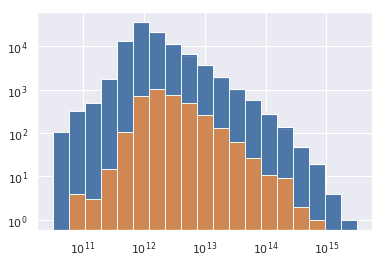

In [96]:
bins = np.logspace(10.5, 15.5, 20)
plt.hist(x[:, 3],bins=bins )
plt.hist(x[non_nan_idxs, 3],bins = bins )
plt.hist(x[~non_nan_idxs, 3],bins = bins , alpha = 0.1)

plt.yscale('log')
plt.xscale('log')

/share/software/user/open/py-jupyter/1.0.0_py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.


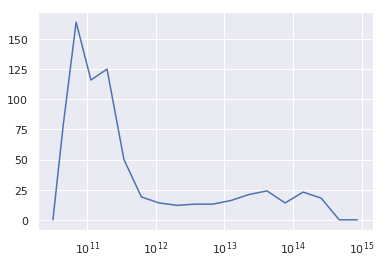

In [108]:
nan_hist, _ = np.histogram(x[~non_nan_idxs,3], bins = bins)
non_nan_hist, _  = np.histogram(x[non_nan_idxs, 3], bins = bins)

plt.plot((bins[:1]+bins[:-1])/2.0, nan_hist/non_nan_hist)
plt.xscale('log')

In [97]:
np.sum(non_nan_idxs)*1.0/non_nan_idxs.shape[0]

0.036420000000000001

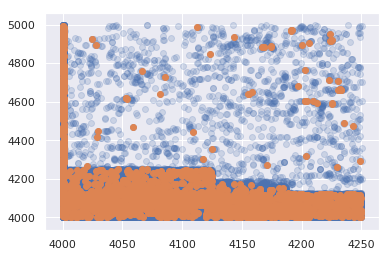

In [98]:
plt.scatter(x[:, 0], x[:, 2], alpha = 0.2)
plt.scatter(x[non_nan_idxs, 0], x[non_nan_idxs, 2], alpha = 1.0)